# Toronto's Neighborhoods Recommender System
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.wallpaperup.com%2Fuploads%2Fwallpapers%2F2013%2F12%2F19%2F199807%2F4d86b2357c55ff2bc433fc0af0705b97.jpg&f=1&nofb=1/toronto.jpeg%E2%80%9D" alt="toronto" align="left" width="600" />

## Table of Contents
1. **[Introduction](#introduction)**
2. **[Data](#data)**  
3. **[Methodology](#methodology)**
4. **[Results](#results)**
5. **[Discussion](#discussion)**
6. **[Conclusion](#conclusion)**

## 1. Introduction<a name="introduction"></a>
According to __[CIC News](https://www.cicnews.com/2020/02/which-cities-in-canada-attract-the-most-immigrants-0213741.html#)__, Canada welcomed more than 341,000 immigrants in 2019 and Toronto has successfully attracted nearly 118,000 immigrants which contribute to almost 35% of the total number of immigrants. **The statistics indicate that most of the immigrants prefer to settle in Toronto over other cities.** Why? __[VisaPlace](https://www.visaplace.com/blog-immigration-law/why-immigrants-settle-in-toronto-heres-10-reasons/)__ has listed out 10 reasons for this question. For me, the most convincing reason is Toronto is Canada’s business and financial capital, that's why immigrants prefer it.

Toronto is Canada’s largest city, it has 6 boroughs which are Etobicoke, North York, East York, Central Toronto, York and Scarborough. These 6 boroughs can be further divided into 140 neighborhoods. According to __[City of Toronto](https://www.toronto.ca/community-people/moving-to-toronto/about-toronto/)__, Toronto is one of the most multicultural cities in the world due to its large population of immigrants all over the world, each Toronto's neighborhood might be quite different from one another. **Therefore, out of 140 neighborhoods in Toronto, how can immigrants decide which neighborhood suits them best?** This is exactly what I want to resolve in this project.

**In this project, I will try to build a Toronto's neighborhoods recommender system based on 4 factors including job opportunities, cost of living, safety and culture.** So, who would be interested in this recommender system? I can say that at least 118,000 people would and I believe that this number will be growing in the future. And of course, I can't wait to find out which neighborhood suit me best too because I wish to migrate to Canada and settle in Toronto in the future. How about you?

## 2. Data<a name="data"></a> 
Previously, I mentioned that the Toronto's neighborhoods recommender system is built on job opportunities, cost of living, safety and culture. In this section, I will explain why these factors are important, describe the data that will be used and their source, finally import and clean the data.

### A. Factors to consider while deciding where to settle
* **Job opportunities**: We have to make a living to support ourselves or our family. And I bet we wish to get our dream job right? So, we need to know what are the common jobs for each neighborhood.
* **Cost of living**: We would like to buy our dream house but how much does it cost? Curious of how much should we earn to afford to live in a specific neighborhood? To answer these questions, we need to know the average house price and household income for each neighborhood.
* **Safety**: We wish to live in a safe and peaceful area but how can we determine if the area is safe? To answer these questions, we need to know the crime rate for each neighborhood.
* **Culture**: We will talk and eat everyday. If possible, we would like to communicate in our favorite language and eat our favorite food right? And it's even better if our favorite things are just around us. So, it's important to know what are the language spoken most often at home and what are the popular food in each neighborhood.

### B. Description of data and data source
|No.| Data           | Data Description  |   Data Source   | 
|:-------------| :------------- | :---------- | :----------- |
|I. | Common jobs| These data show the common jobs for each neighborhood. The data categorize jobs according to North American Industry Classification System (NAICS) 2012. For example: 54-Professional, scientific and technical services, 23-Construction, etc. | I extracted the data from the __[2016 Toronto Neighborhood Profiles](https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv)__. City of Toronto uses the 2016 Canadian Census to provide a portrait of the demographic, social and economic characteristics of the people and households in each Toronto's neighbourhood. |
|II. | Average house price and household income | These data show the average house price and household income for each neighborhood in Canadian Dollar (CAD). The home affordability for each neighborhood also calculated.| I scraped the data current as of October 2020 from __[Realosophy](https://www.realosophy.com/toronto/neighbourhood-map)__. Realosophy is a real estate brokerage company that helps their customers make better decision based on data. |
|III. |Crime rate| These data show the crime rate per 100,000 people for each neighborhood. | I get the data from the __[Toronto Neighborhood Crime Rates Boundary File](https://data.torontopolice.on.ca/datasets/neighbourhood-crime-rates-boundary-file-?geometry=-79.598%2C43.673%2C-79.158%2C43.760&orderBy=OBJECTID&page=6)__ by calling a REST API from Toronto Police Service. The file contains the 2014-2019 crime data by neighbourhood. |
|IV. |Language spoken most often at home|  These data show the language spoken most often at home in each neighborhood. For example: English, Spanish, Italian, French, etc.  | I extracted the data from the __[2016 Toronto Neighborhood Profiles](https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv)__. |
|V. |Popular food| These data show the popular food categories around each neighborhood according to Foursquare API. For example: Italian food, Korean food, Japanese food, etc. | I get the data through __[Foursqure API](https://developer.foursquare.com/docs/)__. Foursquare is a location technology platform dedicated to improve how people move through the real world. |
|VI. |Boundaries of neighborhoods| These data contain the boundary of each neighborhood in GeoJSON file. These data are used to create the boundary of each neighborhood on a map. | I get the data from __[Boundaries of Toronto's Neighbourhoods](https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/a083c865-6d60-4d1d-b6c6-b0c8a85f9c15?format=geojson&projection=4326)__. City of Toronto made the data available on its open data portal. |

### C. Import data and data wrangling

#### I. Common jobs data
Now, let's import and clean the common jobs data first.

In [1]:
# import necessary library
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [2]:
# define a function to return a dataframe of top 5 elements
def get_top5_elements(dataframe,column_name):
    first_element=[]
    second_element=[]
    third_element=[]
    fourth_element=[]
    fifth_element=[]
    first_column=dataframe.iloc[:,0].values
    second_column=dataframe.iloc[:,1].values
    for i in range(140):
        sorted_elements=dataframe.iloc[i,2:].sort_values(ascending=False).index
        first_element.append(sorted_elements[0])
        second_element.append(sorted_elements[1])
        third_element.append(sorted_elements[2])
        fourth_element.append(sorted_elements[3])
        fifth_element.append(sorted_elements[4])
    return pd.DataFrame({'Neighborhood':first_column,'ID':second_column,'1st Most Common {}'.format(column_name):first_element,
                         '2nd Most Common {}'.format(column_name):second_element,'3rd Most Common {}'.format(column_name):third_element,
                         '4th Most Common {}'.format(column_name):fourth_element,'5th Most Common {}'.format(column_name):fifth_element})

In [3]:
# import the 2016 toronto neighborhood profiles into toronto_2016_df and clean the dataframe
toronto_2016_df=pd.read_csv('https://ckan0.cf.opendata.inter.prod-toronto.ca/download_resource/ef0239b1-832b-4d0b-a1f3-4153e53b189e?format=csv')
toronto_2016_df.drop(['_id','Category','Data Source','City of Toronto'],axis=1,inplace=True)
index=['Neighbourhood Number']

# extract common jobs data from toronto_2016_df into common_jobs_df and clean the dataframe
common_jobs_df=toronto_2016_df[(toronto_2016_df['Topic']=='Industry - North American Industry Classification System (NAICS) 2012')|
                               toronto_2016_df['Characteristic'].isin(index)].drop('Topic',axis=1).set_index('Characteristic').T
common_jobs_df.columns=common_jobs_df.columns.str.strip()
common_jobs_df=common_jobs_df.drop(['Total Labour Force population aged 15 years and over by Industry - North American Industry Classification System (NAICS) 2012 - 25% sample data',
                                    'Industry - NAICS2012 - not applicable','All industry categories'],axis=1)
common_jobs_df=common_jobs_df.replace(',','',regex=True).astype(int).sort_values(index).rename_axis(None,axis=1).reset_index()
common_jobs_df.rename(columns={'index':'Neighborhood','Neighbourhood Number':'ID'},inplace=True)
common_jobs_df.loc

# get top 5 common jobs and save the data into top5_common_jobs_df
top5_common_jobs_df=get_top5_elements(common_jobs_df,'Job')
top5_common_jobs_df.tail()

,Neighborhood,ID,1st Most Common Job,2nd Most Common Job,3rd Most Common Job,4th Most Common Job,5th Most Common Job
0,West Humber-Clairville,1,31-33 Manufacturing,44-45 Retail trade,48-49 Transportation and warehousing,62 Health care and social assistance,"56 Administrative and support, waste managemen..."
1,Mount Olive-Silverstone-Jamestown,2,31-33 Manufacturing,44-45 Retail trade,62 Health care and social assistance,48-49 Transportation and warehousing,72 Accommodation and food services
2,Thistletown-Beaumond Heights,3,31-33 Manufacturing,44-45 Retail trade,48-49 Transportation and warehousing,23 Construction,62 Health care and social assistance
3,Rexdale-Kipling,4,44-45 Retail trade,31-33 Manufacturing,62 Health care and social assistance,"56 Administrative and support, waste managemen...",48-49 Transportation and warehousing
4,Elms-Old Rexdale,5,44-45 Retail trade,31-33 Manufacturing,62 Health care and social assistance,48-49 Transportation and warehousing,"56 Administrative and support, waste managemen..."


In [4]:
# normalize the common_jobs_df
columns_to_normalize=common_jobs_df.columns[2:]
for columns in columns_to_normalize:
    common_jobs_df[columns]=common_jobs_df[columns]/common_jobs_df[columns].max()
    common_jobs_df[columns]=common_jobs_df[columns].round(2)
common_jobs_df.head()

,Neighborhood,ID,"11 Agriculture, forestry, fishing and hunting","21 Mining, quarrying, and oil and gas extraction",22 Utilities,23 Construction,31-33 Manufacturing,41 Wholesale trade,44-45 Retail trade,48-49 Transportation and warehousing,51 Information and cultural industries,52 Finance and insurance,53 Real estate and rental and leasing,"54 Professional, scientific and technical services",55 Management of companies and enterprises,"56 Administrative and support, waste management and remediation services",61 Educational services,62 Health care and social assistance,"71 Arts, entertainment and recreation",72 Accommodation and food services,81 Other services (except public administration),91 Public administration
0,West Humber-Clairville,1,0.33,0.11,0.18,0.49,1.00,0.49,0.68,1.00,0.13,0.08,0.18,0.08,0.14,0.57,0.33,0.49,0.23,0.39,0.56,0.25
1,Mount Olive-Silverstone-Jamestown,2,0.67,0.05,0.06,0.45,0.95,0.44,0.53,0.73,0.10,0.05,0.11,0.05,0.12,0.49,0.20,0.40,0.15,0.37,0.46,0.16
2,Thistletown-Beaumond Heights,3,0.00,0.05,0.08,0.22,0.24,0.15,0.22,0.27,0.04,0.02,0.05,0.02,0.00,0.13,0.09,0.12,0.05,0.11,0.14,0.08
3,Rexdale-Kipling,4,0.42,0.00,0.08,0.21,0.22,0.17,0.22,0.27,0.03,0.02,0.06,0.02,0.00,0.21,0.12,0.16,0.06,0.09,0.17,0.11
4,Elms-Old Rexdale,5,0.00,0.00,0.00,0.14,0.18,0.15,0.18,0.25,0.03,0.02,0.06,0.02,0.08,0.15,0.10,0.15,0.03,0.09,0.15,0.08


#### II. Average house price and household income data
Now, let's scrape the average house price and household income data from Realosophy and clean the data.

In [5]:
# import necessary libraries
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from bs4 import BeautifulSoup
firefox_options=Options()
firefox_options.add_argument('-headless')

In [6]:
# define a function to scrape each neighborhood's name and website by borough
def get_neighborhood_websites(borough):
    neighborhoods_list_driver=webdriver.Firefox(options=firefox_options)
    neighborhoods_list_driver.get('https://www.realosophy.com/{}-former-toronto/neighbourhood-map'.format(borough))
    time.sleep(5)
    neighborhoods_list_html=neighborhoods_list_driver.page_source
    neighborhoods_list_html_scraper=BeautifulSoup(neighborhoods_list_html,'lxml')
    neighborhoods_list_raw_data=neighborhoods_list_html_scraper.find('div',{'class':'row mt-4'})
    neighborhoods_list_data=neighborhoods_list_raw_data.find_all('a')
    neighborhood=[]
    website=[]
    for neighborhoods_list in neighborhoods_list_data:
        neighborhood.append(neighborhoods_list.text)
        website_temp=neighborhoods_list['href'].replace('/','https://www.realosophy.com/',1)
        website.append(website_temp)
    neighborhoods_list_driver.quit()
    print('...',end='')
    return pd.DataFrame({'Neighborhood':neighborhood,'Website':website})

In [7]:
# define a function to get the avg house price or household income in numerical result
def get_number_only(money_in_str):
    clear_space=money_in_str.text.strip()
    clear_dollar_sign=clear_space.replace('$','')
    clear_character=clear_dollar_sign.replace(',','')
    if 'M' in clear_character:
        string=clear_character.replace('M','')
        number=float(string)
        result=int(number*1000000)
        return result
    else:
        string=clear_character.replace('K','')
        number=float(string)
        result=int(number*1000)
        return result

In [8]:
# scrape etobicoke's neighborhoods and websites into etobicoke_website_df then insert neighborhoods ID
print('Almost...',end='')
etobicoke_website_df=get_neighborhood_websites('etobicoke')
etobicoke_website_df.drop(25,inplace=True)
etobicoke_website_df['ID']=[20,11,1,14,13,17,8,9,14,6,19,12,17,18,10,14,4,7,2,16,5,15,16,3,11]

# scrape north york's neighborhoods and websites into north_york_website_df then insert neighborhoods ID
north_york_website_df=get_neighborhood_websites('north-york')
north_york_website_df.loc[len(north_york_website_df.index)]=north_york_website_df.loc[31,:]
north_york_website_df.loc[len(north_york_website_df.index)]=north_york_website_df.loc[39,:]
north_york_website_df['ID']=[38,42,34,52,49,43,24,41,30,39,33,39,42,47,45,26,44,31,25,45,53,48,41,21,23,22,38,32,
                             41,39,29,36,45,23,46,28,43,41,35,37,40,27,31,50,51]

# scrape east york's neighborhoods and websites into east_york_website_df then insert neighborhoods ID
east_york_website_df=get_neighborhood_websites('east-york')
east_york_website_df['ID']=[56,57,59,61,56,58,54,55,54,54,60]

# scrape central toronto's neighborhoods and websites into central_toronto_website_df then insert neighborhoods ID
central_toronto_website_df=get_neighborhood_websites('central-toronto')
central_toronto_website_df=central_toronto_website_df.drop([16,47,69,74]).reset_index(drop=True)
central_toronto_website_df.loc[len(central_toronto_website_df.index)]=central_toronto_website_df.loc[39,:]
central_toronto_website_df.loc[len(central_toronto_website_df.index)]=central_toronto_website_df.loc[35,:]
central_toronto_website_df.loc[len(central_toronto_website_df.index)]=central_toronto_website_df.loc[20,:]
central_toronto_website_df['ID']=[78,103,76,84,105,80,89,83,71,91,96,100,78,93,75,77,73,66,93,99,97,77,93,83,92,77,
                                  77,76,101,102,82,77,77,90,87,94,74,78,70,82,81,103,98,73,103,67,96,92,72,68,70,
                                  86,98,95,79,77,96,85,73,74,77,97,87,105,95,63,67,90,69,81,82,62,93,77,64,75,95,
                                  65,88,104]

# scrape york's neighborhoods and websites into york_website_df then insert neighborhoods ID
york_website_df=get_neighborhood_websites('york')
york_website_df=york_website_df.drop(11).reset_index(drop=True)
york_website_df['ID']=[114,112,108,109,106,110,114,115,107,114,111,113]

# scrape scarborough's neighborhoods and websites into scarborough_website_df then insert neighborhoods ID
scarborough_website_df=get_neighborhood_websites('scarborough')
scarborough_website_df.loc[len(scarborough_website_df.index)]=scarborough_website_df.loc[0,:]
scarborough_website_df['ID']=[128,127,122,120,120,123,122,126,138,140,134,125,124,117,132,119,130,135,135,121,133,
                              131,139,116,118,136,131,119,137,129]

# concatenate etobicoke_website_df, north_york_website_df, east_york_website_df, central_toronto_website_df,
# york_website_df and scarborough_website_df into neighborhood_website_df
neighborhood_website_df=pd.concat([etobicoke_website_df,north_york_website_df,east_york_website_df,
                                  central_toronto_website_df,york_website_df,scarborough_website_df])
neighborhood_website_df=neighborhood_website_df.sort_values('ID').reset_index(drop=True)
print('...Done!',end='')
neighborhood_website_df.head()

Almost........................Done!

,Neighborhood,Website,ID
0,Clairville,https://www.realosophy.com/clairville-toronto/...,1
1,Smithfield,https://www.realosophy.com/smithfield-toronto/...,2
2,Thistletown,https://www.realosophy.com/thistletown-toronto...,3
3,Rexdale,https://www.realosophy.com/rexdale-toronto/nei...,4
4,The Elms,https://www.realosophy.com/the-elms-toronto/ne...,5


In [9]:
# scrape average house price and household income for each neighborhood into neighborhood_website_df
print('Progress:',end='')
avg_houseprice_income_driver=webdriver.Firefox(options=firefox_options)
neighborhood_website_df['Avg House Price']=0
neighborhood_website_df['Avg Household Income']=0
for i in range(len(neighborhood_website_df['ID'])):
    avg_houseprice_income_driver.get(neighborhood_website_df['Website'][i])
    time.sleep(5)
    avg_houseprice_income_html=avg_houseprice_income_driver.page_source
    avg_houseprice_income_scraper=BeautifulSoup(avg_houseprice_income_html,'lxml')
    avg_houseprice_data=avg_houseprice_income_scraper.find('div',{'class':'key-stats__avg-sale-price ng-binding ng-scope'})        
    avg_income_data=avg_houseprice_income_scraper.find('p',{'class':'h3 font-sans-caption-bold mb-0 text-center text-sm-left ng-binding ng-scope'})
    while avg_houseprice_data==None or avg_income_data==None:
        avg_houseprice_income_driver.get(neighborhood_website_df['Website'][i])
        time.sleep(5)
        avg_houseprice_income_html=avg_houseprice_income_driver.page_source
        avg_houseprice_income_scraper=BeautifulSoup(avg_houseprice_income_html,'lxml')
        avg_houseprice_data=avg_houseprice_income_scraper.find('div',{'class':'key-stats__avg-sale-price ng-binding ng-scope'})        
        avg_income_data=avg_houseprice_income_scraper.find('p',{'class':'h3 font-sans-caption-bold mb-0 text-center text-sm-left ng-binding ng-scope'})
    neighborhood_website_df['Avg House Price'][i]=get_number_only(avg_houseprice_data)
    neighborhood_website_df['Avg Household Income'][i]=get_number_only(avg_income_data)
    print('.',end='')
avg_houseprice_income_driver.quit()

# group neighborhood_website_df by neighborhood ID and save the data into avg_houseprice_income_df
neighborhood_website_df.drop('Neighborhood',axis=1,inplace=True)
neighborhood_website_df=neighborhood_website_df.groupby('ID').mean().reset_index()
neighborhood_website_df['Avg House Price']=neighborhood_website_df['Avg House Price'].astype(int)
neighborhood_website_df['Avg Household Income']=neighborhood_website_df['Avg Household Income'].astype(int)
avg_houseprice_income_df=common_jobs_df.iloc[:,0:2]
avg_houseprice_income_df['Avg House Price']=neighborhood_website_df['Avg House Price']
avg_houseprice_income_df['Avg Household Income']=neighborhood_website_df['Avg Household Income']
print('...Done!')
avg_houseprice_income_df.head()

Progress:

<ipython-input-9-1835e90e00c1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood_website_df['Avg House Price'][i]=get_number_only(avg_houseprice_data)
<ipython-input-9-1835e90e00c1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighborhood_website_df['Avg Household Income'][i]=get_number_only(avg_income_data)


..............................................................................................................................................................................................................Done!


,Neighborhood,ID,Avg House Price,Avg Household Income
0,West Humber-Clairville,1,587000,94000
1,Mount Olive-Silverstone-Jamestown,2,578000,79000
2,Thistletown-Beaumond Heights,3,898000,94000
3,Rexdale-Kipling,4,744000,91000
4,Elms-Old Rexdale,5,600000,82000


In [54]:
import matplotlib.pyplot as plt
avg_houseprice_income_df['Avg House Price'].describe()

count    1.400000e+02
mean     1.102194e+06
std      5.519263e+05
min      4.960000e+05
25%      7.459995e+05
50%      9.590000e+05
75%      1.210625e+06
max      4.425000e+06
Name: Avg House Price, dtype: float64

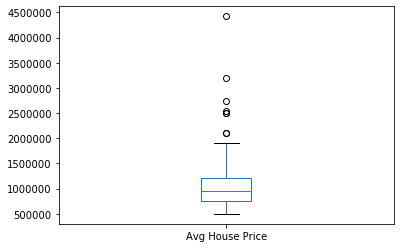

In [56]:
avg_houseprice_income_df['Avg House Price'].plot.box()

In [61]:
QR_price.shape

(132,)

In [63]:
QR_price

0       587000
1       578000
2       898000
3       744000
4       600000
5       577000
6       969000
7       839000
8      1600000
9      1900000
10      994000
11      933000
12      628000
13      849000
14     1900000
15     1030000
16      788500
17      956000
18      899000
19     1100000
20      789000
21      671000
22      737000
23      514000
24      661000
25      733000
26      665000
27     1000000
28     1000000
29      686000
30     1024500
31      954000
32     1000000
33     1100000
34      693000
35     1100000
36      962000
37     1350000
41     1802500
42      846000
43      496000
44     1078666
45      703000
46      863000
47      899000
48     1100000
49     1100000
50      962000
51      838000
52      623000
53     1160333
54      606000
56     1000000
57     1200000
58     1200000
59     1100000
60      638000
61     1000000
62     1500000
63     1100000
64      714000
65     1200000
66     1550000
67     1700000
68     1200000
69     1100000
70     140

In [65]:
import numpy as np

In [68]:
avg_houseprice_income_df['Avg House Price'].describe()

count    1.400000e+02
mean     1.102194e+06
std      5.519263e+05
min      4.960000e+05
25%      7.459995e+05
50%      9.590000e+05
75%      1.210625e+06
max      4.425000e+06
Name: Avg House Price, dtype: float64

In [73]:
a=pd.qcut(avg_houseprice_income_df['Avg House Price'], q=3)
a.value_counts()

(818000.0, 1100000.0]     51
(495999.999, 818000.0]    47
(1100000.0, 4425000.0]    42
Name: Avg House Price, dtype: int64

In [74]:
b=pd.qcut(QR_price,q=3)
b.value_counts()

(804333.333, 1100000.0]     54
(495999.999, 804333.333]    44
(1100000.0, 1900000.0]      34
Name: Avg House Price, dtype: int64

In [75]:
print(np.linspace(min(avg_houseprice_income_df['Avg House Price']), max(avg_houseprice_income_df['Avg House Price']), 4))

[ 496000.         1805666.66666667 3115333.33333333 4425000.        ]


In [66]:
print(np.linspace(min(QR_price), max(QR_price), 4))
bin=[]

[ 496000.  964000. 1432000. 1900000.]


In [ ]:
print(np.linspace(min(QR_price), max(QR_price), 4))
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head()

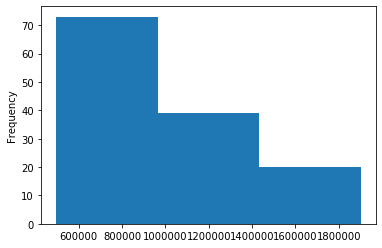

In [62]:
QR_price.plot.hist(bins=3)

49061.25 1907563.25


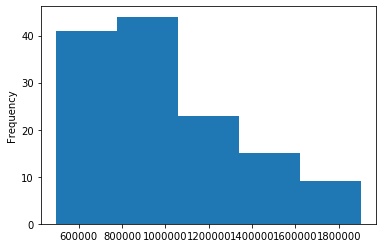

In [57]:
Q1=avg_houseprice_income_df['Avg House Price'].quantile(0.25)
Q3=avg_houseprice_income_df['Avg House Price'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lower_bound,upper_bound)

QR_price = avg_houseprice_income_df['Avg House Price'][~((avg_houseprice_income_df['Avg House Price'] < lower_bound) |(avg_houseprice_income_df['Avg House Price'] > upper_bound))]
QR_price.plot.hist(bins=3)

In [17]:
# calculate the home affordability for each neighborhood
avg_houseprice_income_df['Home Affordability']=avg_houseprice_income_df['Avg Household Income']/avg_houseprice_income_df['Avg House Price']

# normalize the column of Home Affordability
avg_houseprice_income_df['Home Affordability']=avg_houseprice_income_df['Home Affordability']/avg_houseprice_income_df['Home Affordability'].max()
avg_houseprice_income_df.head()

,Neighborhood,ID,Avg House Price,Avg Household Income,Home Affordability
0,West Humber-Clairville,1,587000,94000,0.715771
1,Mount Olive-Silverstone-Jamestown,2,578000,79000,0.610919
2,Thistletown-Beaumond Heights,3,898000,94000,0.467882
3,Rexdale-Kipling,4,744000,91000,0.546705
4,Elms-Old Rexdale,5,600000,82000,0.610868


#### III. Crime rate data
Now, let's get the crime rate data by calling a REST API from Toronto Police Service and clean the data.

In [10]:
import requests
from pandas.io.json import json_normalize
url = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Neighbourhood_MCI/FeatureServer/0/query?where=1%3D1&outFields=Neighbourhood,Hood_ID,Population,Assault_AVG,AutoTheft_AVG,Homicide_AVG,TheftOver_AVG,BreakandEnter_AVG,Robbery_AVG&outSR=4326&f=json'
results = requests.get(url).json()
crime_data = results['features']
dataframe = json_normalize(crime_data)

In [11]:
language_df = toronto_2016_df.loc[393:670]

## 3. Methodology<a name="methodology"></a>

## 4. Results<a name="results"></a>

## 5. Discussion<a name="discussion"></a>

## 6. Conclusion<a name="conclusion"></a>

### Thank you for reading this notebook! Feel free to read the __[full report]()__ and the __[blogpost]()__ too! 

## Author  
__[Titus Chin Jun Hong](https://www.linkedin.com/in/joseph-s-50398b136/)__  
**13 November 2020**